<a href="https://colab.research.google.com/github/andra2602/Music-Recommendation-System-History/blob/main/KaggleProiectAMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STAGE 0 – SETUP AND PREPROCESSING
- General idea: This stage represents the process of preparing the data and the working environment, which is essential for any recommendation system. The objective is to collect, clean, and structure the data so that the later models (content-based or collaborative) can function correctly. Practically, in this phase the system organizes its data before learning the users’ preferences.

- Main steps:

  - Data collection: extracting songs, metadata (genre, artist, year, popularity), and listening history.

  - Data cleaning: removing missing values, duplicate entries, and correcting inconsistencies.

  - Normalization and vectorization: transforming text, labels, and numerical attributes into mathematical representations (vectors, matrices, embeddings).

  - Data splitting: dividing the dataset into training and testing sets, required for evaluating model performance.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


## Uploading the Kaggle Dataset File

In [2]:
from google.colab import files
uploaded = files.upload()


Saving spotify_songs.csv to spotify_songs.csv


In [3]:
import pandas as pd

df = pd.read_csv("spotify_songs.csv")
print(df.shape)
df.tail(20)

(32833, 23)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,2014-02-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.040,0,0.0409,0.006780,0.000000,0.0677,0.3910,127.906,204609
32814,7eVZbb7YlUopOeuiyRcJ7Z,Heartbeat (feat. Collin McLoughlin),Vicetone,1,6BVBm72Q7gLZUEm1fyoBB7,Monstercat 012 - Aftermath,2013-03-11,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,11,-4.069,0,0.0762,0.035000,0.000002,0.4600,0.2170,127.996,393750
32815,6h9xi8i9zVOXk5FqGqcBNH,We Own The Night - The Chainsmokers Edit,The Wanted,39,2wtNwzvBanX2qlunqJav1p,We Own The Night,2013-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,8,-3.561,0,0.0389,0.014100,0.008300,0.0897,0.4020,126.001,228987
32816,5dpKnqLjEbInIS8aEvInpQ,Dear Life - Original Mix,Dannic,27,35W2X8jv3n53ZPrDONQPBF,Dear Life,2014-04-14,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-4.456,0,0.2830,0.007130,0.037200,0.4070,0.3630,127.988,337500
32817,2OgOeXUb4bIXE4vGDVDaRO,EIFORYA,Armin van Buuren,33,40IMv2dwOU1C6ZSuuolZzk,EIFORYA,2014-04-14,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,9,-6.137,0,0.0951,0.072000,0.506000,0.1430,0.1620,132.048,161779
32818,3tBHQJmuE0BOKR7l4Anap5,Beam Me Up (Kill Mode) (Radio Edit),CAZZETTE,1,5ZAKzV4ZIa5Gt7z29OYHv0,Eject pt. I,2012-11-11,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-3.156,1,0.0447,0.008380,0.000003,0.0896,0.2800,125.967,203810
32819,3H585qZxWJVpCIcvc0XhEP,Dawn - Hardwell Edit,Michael Brun,10,0utUWvjdQJMf0EFQCnaxml,Dawn,2012-01-02,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-6.664,1,0.0621,0.000502,0.932000,0.0679,0.3390,127.985,377930
32820,4BwaVpGVeCBh8qeQ1hk2my,Leaving You - Thomas Newson Radio Edit,Audien,16,06wngxHMJd8kIjtAwcxFkh,Leaving You (Remixes - Part 1),2013-10-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,9,-4.037,0,0.0634,0.047000,0.006800,0.1830,0.6870,127.940,187500
32821,3fgNmvYq0QU5aFHDUMa4cm,Unleash (Life In Color Anthem 2014) - Original...,Adventure Club,0,4qzYTF7mwcWMbEFdw5qcHB,Unleash,2014-04-16,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-4.514,0,0.0547,0.004440,0.000041,0.0433,0.3420,127.979,331000
32822,00UpV14MDfk4CvrMbFvqji,It Won't Stop (feat. Chris Brown) - Julian Cal...,Sevyn Streeter,0,52FeJmVsUJfoQybiwI5j9m,Atlantic Records Miami 2014,2014-04-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-5.525,0,0.0478,0.009390,0.003050,0.1150,0.2160,128.025,298125


## Data Cleaning, Reduction & Normalization

In [4]:
cols = [
    'track_name', 'track_artist', 'playlist_genre',
    'danceability', 'energy', 'valence', 'tempo',
    'acousticness', 'liveness', 'speechiness'
]

df = df[cols].dropna().drop_duplicates()
print(" Size after cleaning:", df.shape)
df.head()


 Size after cleaning: (29865, 10)


,track_name,track_artist,playlist_genre,danceability,energy,valence,tempo,acousticness,liveness,speechiness
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,pop,0.748,0.916,0.518,122.036,0.1020,0.0653,0.0583
1,Memories - Dillon Francis Remix,Maroon 5,pop,0.726,0.815,0.693,99.972,0.0724,0.3570,0.0373
2,All the Time - Don Diablo Remix,Zara Larsson,pop,0.675,0.931,0.613,124.008,0.0794,0.1100,0.0742
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,pop,0.718,0.930,0.277,121.956,0.0287,0.2040,0.1020
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,pop,0.650,0.833,0.725,123.976,0.0803,0.0833,0.0359


In [5]:
df_subset = df.sample(n=5000, random_state=42)
print(" I selected a subset of", df_subset.shape[0], "songs.")


 I selected a subset of 5000 songs.


In [6]:
from sklearn.preprocessing import MinMaxScaler

feature_cols = [
    'danceability', 'energy', 'valence', 'tempo',
    'acousticness', 'liveness', 'speechiness'
]
scaler = MinMaxScaler()
X = scaler.fit_transform(df_subset[feature_cols])

print(" Full normalization:", X.shape)


 Full normalization: (5000, 7)


### Creating the attribute vector for each song



In [7]:
# we reintroduced the normalized columns into the attribute vectors

for i, col in enumerate(feature_cols):
    df_subset[f"{col}_scaled"] = X[:, i]

df_subset.head()


,track_name,track_artist,playlist_genre,danceability,energy,valence,tempo,acousticness,liveness,speechiness,danceability_scaled,energy_scaled,valence_scaled,tempo_scaled,acousticness_scaled,liveness_scaled,speechiness_scaled
15006,Cryin',Vixen,rock,0.657,0.567,0.563,109.007,0.14600,0.0554,0.0261,0.64369,0.563446,0.568109,0.321924,0.148524,0.041182,0.003686
28305,I'm In Love,NDR8,edm,0.595,0.925,0.450,126.048,0.00216,0.0788,0.0841,0.57487,0.924384,0.454081,0.433968,0.002196,0.065036,0.068476
27460,Lone Digger,Caravan Palace,edm,0.769,0.931,0.874,123.974,0.59800,0.1150,0.0495,0.76801,0.930434,0.881936,0.420331,0.608341,0.101937,0.029826
7860,The Booty Dub,DJ Magic Mike,rap,0.813,0.531,0.604,127.865,0.01560,0.0749,0.0815,0.81685,0.527151,0.609481,0.445914,0.015868,0.061060,0.065572
17563,Qué Voy a Hacer Con Mi Amor,Alejandro Fernandez,latin,0.536,0.457,0.499,165.693,0.38000,0.1690,0.0405,0.50938,0.452544,0.503527,0.694632,0.386571,0.156983,0.019772


### Correlation between attributes


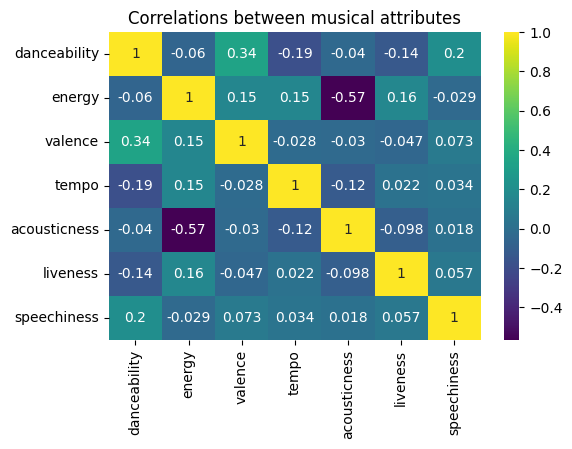

In [8]:
plt.figure(figsize=(6,4))

# .corr() computes the Pearson coefficients between each pair of attributes.
sns.heatmap(df_subset[feature_cols].corr(), annot=True, cmap="viridis")
plt.title("Correlations between musical attributes")
plt.show()

"""
Interpretation:
- Danceability – Valence: 0.34
  Weak positive relationship → more danceable songs tend to be slightly happier.

- Energy – Valence: 0.15
  Very weak link → energetic songs are not necessarily happy.

- Energy – Tempo: 0.15
  Makes sense: faster songs can be somewhat more energetic, but not always.

- Danceability – Tempo: -0.19
  Slight negative value → interesting: very fast songs are not necessarily easy to dance to.

"""
pass




# STAGE 1 – CONTENT-BASED FILTERING (EARLY ERA)
- General idea: In this stage, recommendation systems relied exclusively on intrinsic content features and on the user’s explicit preferences. If a user liked a certain song, the system identified other items with similar properties — such as musical genre, artist, tempo, lyrics, or instrumentation. Recommendations were generated strictly based on item descriptions, not on the behavior of other users.

- Models used:

  - Similarity analysis (e.g., cosine similarity, TF-IDF, etc.) — compares content attributes to identify similar items.

  - User profile — the system builds a profile based on the songs previously listened to and uses it to select content with similar style and characteristics.

- Historical context: This period spans the 1990s to the early 2000s, when recommendation systems were relatively simple and mainly based on metadata and explicit content features. It represents the first attempts to automate user preferences through text analysis, genre classification, or descriptive metadata — at a time when the social or collaborative component was still missing and would later evolve through Collaborative Filtering.


## 1.1 Imports



In [9]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


## 1.2 Similarity Matrix
- In this stage, I built the similarity matrix between songs using the Cosine Similarity method.

- This measure computes the angle between the vectors of musical attributes (danceability, energy, valence, tempo, acousticness, liveness, speechiness) and indicates how close two tracks are in terms of their sonic “profile,” independent of the magnitude of their values.

- A value close to 1 signifies a high degree of similarity between songs (similar style), while a value close to 0 highlights significant differences in their audio characteristics.


In [10]:
# feature_cols = ['danceability', 'energy', 'valence', 'tempo']
# X = scaler.fit_transform(df_subset[feature_cols])

X_scaled = X
sim_matrix = cosine_similarity(X_scaled)
print(" Similarity matrix:", sim_matrix.shape)


 Similarity matrix: (5000, 5000)


### 1.2.1 Comparing Similarity Metrics – Cosine, Euclidean, and Manhattan

- I analyzed three methods for measuring similarity between songs: Cosine Similarity, Euclidean distance, and Manhattan distance.

  - Cosine Similarity provides the most stable and relevant results for normalized musical data because it evaluates the angle between attribute vectors and accurately captures similarities in the “sound profile” (the combination of the four attributes).

  - In contrast, Euclidean and Manhattan distances rely on absolute differences between values and may distort the perception of similarity when attributes have different scales or distributions.


In [12]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import pandas as pd

# Euclidean distance – we convert it into similarity (small distance = high similarity)
dist_euc = euclidean_distances(X_scaled)
sim_euc = 1 / (1 + dist_euc)

# Manhattan distance – converted in the same way
dist_man = manhattan_distances(X_scaled)
sim_man = 1 / (1 + dist_man)


# -----------------------------------------------------------------------------------
sample_idx = [0, 1, 2]  # first 3 songs

sample_info = (
    df_subset[['track_name', 'track_artist', 'playlist_genre']]
    .iloc[sample_idx]
    .apply(lambda row: f"{row['track_name']} — {row['track_artist']} — {row['playlist_genre']}", axis=1)
    .values
)

print("The three songs used:\n")
for info in sample_info:
    print("-", info)

sample_names = df_subset.iloc[sample_idx]['track_name'].tolist()


# Building the tables
small_cos = pd.DataFrame(sim_matrix[sample_idx][:, sample_idx],
                         index=sample_names, columns=sample_names)

small_euc = pd.DataFrame(sim_euc[sample_idx][:, sample_idx],
                         index=sample_names, columns=sample_names)

small_man = pd.DataFrame(sim_man[sample_idx][:, sample_idx],
                         index=sample_names, columns=sample_names)

print("\nCOSINE SIMILARITY (3 songs):")
display(small_cos)

print("\nEUCLIDEAN SIMILARITY (3 songs):")
display(small_euc)

print("\nMANHATTAN SIMILARITY (3 songs):")
display(small_man)

The three songs used:

- Cryin' — Vixen — rock
- I'm In Love — NDR8 — edm
- Lone Digger — Caravan Palace — edm

COSINE SIMILARITY (3 songs):


,Cryin',I'm In Love,Lone Digger
Cryin',1.000000,0.942793,0.963234
I'm In Love,0.942793,1.000000,0.899699
Lone Digger,0.963234,0.899699,1.000000



EUCLIDEAN SIMILARITY (3 songs):


,Cryin',I'm In Love,Lone Digger
Cryin',1.000000,0.698255,0.592221
I'm In Love,0.698255,1.000000,0.565397
Lone Digger,0.592221,0.565397,1.000000



MANHATTAN SIMILARITY (3 songs):


,Cryin',I'm In Love,Lone Digger
Cryin',1.000000,0.528877,0.408121
I'm In Love,0.528877,1.000000,0.430593
Lone Digger,0.408121,0.430593,1.000000


## 1.3 Content-Based Recommendation Function

The `recommend_content_based()` function uses the similarity matrix to identify the closest songs to a given track. The user can enter the song name even partially, and the function searches for the best match within the current subset (`df_subset`).

- Steps performed:

1. Searching for the song in the subset, allowing partial matches of the input title.

2. Locating the song’s index in the DataFrame and extracting the corresponding row from the similarity matrix.

3. Sorting the similarity scores and selecting the top N closest tracks (excluding the input song).

4. Building a results DataFrame that includes the title, artist, genre, and similarity score.

5. Displaying the recommendations in a clear and interpretable format.

This function represents the central component of the Content-Based Filtering module: it recommends songs with a similar acoustic profile, based on the selected attributes (danceability, energy, valence, and tempo).


In [13]:
def recommend_content_based_table(song_name, similarity_matrix, top_n=5):
    # song search (partial match)
    matches = df_subset[df_subset['track_name'].str.contains(song_name, case=False, na=False)]
    if matches.empty:
        return None  # or you can return an empty DataFrame

    # position in the subset
    idx_local = matches.index[0]
    idx_pos = df_subset.index.get_loc(idx_local)

    # similarity scores for the selected song
    sim_scores = similarity_matrix[idx_pos]

    # top N songs
    similar_indices = sim_scores.argsort()[::-1][1:top_n+1]

    # final table
    recs = df_subset.iloc[similar_indices][
        ['track_name', 'track_artist', 'playlist_genre']
    ].copy()

    recs['similarity'] = sim_scores[similar_indices]
    recs['similarity'] = recs['similarity'].apply(lambda x: round(float(x), 3))

    return recs


* We created an auxiliary function to compare the recommendations generated by the three different similarity metrics: Cosine, Euclidean, and Manhattan.

* The function displays, for the same song, the closest results from each model, allowing us to analyze the differences and justify choosing Cosine Similarity as the primary method.


In [14]:
def compare_similarity_tables(song_name, top_n=5):
    out = {}

    out['Cosine Similarity'] = recommend_content_based_table(song_name, sim_matrix, top_n)
    out['Euclidean Similarity'] = recommend_content_based_table(song_name, sim_euc, top_n)
    out['Manhattan Similarity'] = recommend_content_based_table(song_name, sim_man, top_n)

    return out


In [15]:
df_subset['track_name'].sample(20).values

array(['Rolling Stone', 'Fuego - Julian Jeweil Remix',
       "Don't Wanna Be Your Girl", 'I Follow Rivers', 'Molly',
       'Machika - Dillon Francis Remix', 'Limelight', 'Black Beatles',
       'Nothing In This World', 'Omri', 'Someone You Loved',
       'Social Media', 'Cowboys', "There's Nothing Holdin' Me Back",
       'Happily Ever After', 'Upper Echelon', 'Bombaclat - Original Mix',
       'Alone (Ken Bauer Remix)', 'Desire - Gryffin Remix',
       'The Last Generation'], dtype=object)

In [16]:
results = compare_similarity_tables("Friends", 10)

from IPython.display import HTML

tables_html = """
<div style="
    display: flex;
    flex-direction: row;
    justify-content: space-between;
    width: 100%;
">
"""

for metric, table in results.items():
    tables_html += f"""
        <div style="
            width: 32%;
            margin-right: 10px;
            border: 1px solid #444;
            padding: 10px;
            box-sizing: border-box;
        ">
            <h3 style="text-align:center;">{metric}</h3>
            {table.to_html(index=False)}
        </div>
    """

tables_html += "</div>"

HTML(tables_html)


track_name,track_artist,playlist_genre,similarity
The Journey,Tom Misch,pop,0.995
I Swear,All-4-One,r&b,0.994
Out of the Blue - 2014 Remastered Version,Michael Learns To Rock,rock,0.992
Hasta Morir,Caifanes,rock,0.991
It's You,Ali Gatie,latin,0.990
Smoking Section,Jelly Roll,rap,0.990
SOS (feat. Aloe Blacc),Avicii,r&b,0.990
I Got This Record,Jwonn,rap,0.990
Na Na Na,Now United,latin,0.989
Tranki,Diamond la Mafia,latin,0.989


## 1.4 Visualization of Songs with PCA

- PCA (Principal Component Analysis) is a dimensionality reduction method that transforms a set of correlated numerical variables (such as danceability, energy, valence, tempo, etc.) into a new space with uncorrelated principal components.

- In this case, PCA was used to project the songs into a two-dimensional space, allowing us to visualize their distribution based on genre.

- Points that appear close on the plot correspond to songs with similar musical profiles, while color-coded clusters indicate similarities between musical genres from the perspective of the numerical features.


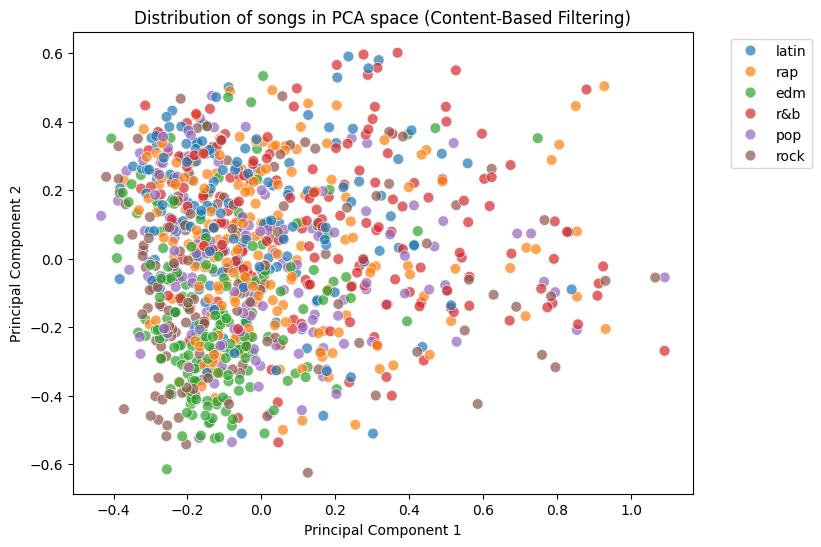

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_viz = df_subset.copy()
df_viz['pca1'] = X_pca[:, 0]
df_viz['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_viz.sample(1000), x='pca1', y='pca2',
                hue='playlist_genre', alpha=0.7, s=60)
plt.title("Distribution of songs in PCA space (Content-Based Filtering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 1.5 Linguistic Analysis of Song Titles (Word Cloud per Genre)

In this stage, I analyzed the song titles for each musical genre, applying a text-cleaning process that included:

- removing special characters, digits, and parentheses;

- converting all text to lowercase;

- filtering standard stopwords (e.g., the, and, a);

- removing music-industry-specific stopwords (feat, remix, edit, version, official, etc.).

For each genre, a separate corpus was built, and a Word Cloud was generated to visually highlight the most frequent words appearing in the titles of songs belonging to that genre.

The results reveal distinct recurring themes for each musical category:

- Rap → money, day, back (themes related to daily life, attitude, personal experiences)

- Pop → love, girl, stay (romantic and emotional themes)

- Latin → amor, solo, noche (passionate themes, Spanish-language titles)

- EDM → love, night, let (energetic vibe, party atmosphere)

- Rock → man, dream, light (introspective, narrative themes)

These Word Clouds provide a quick visual perspective on the identity of each genre and complement the PCA analysis performed earlier, confirming the thematic differences between genres both at the acoustic level and the lexical level.


In [18]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

In [19]:
from wordcloud import STOPWORDS as WC_STOPWORDS
import re

# personalized stopwords
CUSTOM_STOPWORDS = {
    "feat", "ft", "featuring",
    "remix", "mix", "version", "edit", "radio",
    "original", "single", "remastered", "club", "remaster",
    "que", "live", "acoustic"
}

#  standard + personalized
ALL_STOPWORDS = set(WC_STOPWORDS) | CUSTOM_STOPWORDS


def clean_words_from_title(title):
    """
    Transform a song title into a list of clean words.
    """
    # remove parentheses (e.g., "Song (feat. X)" → "Song ")

    title = re.sub(r"\(.*?\)", "", title)

    words = title.split()
    cleaned = []

    for w in words:
        w = w.lower()
        w = re.sub(r'[^a-z0-9]+', '', w)   #we only keep the letters/digits

        if not w:
            continue

        if len(w) <= 2:
            continue

        if w in ALL_STOPWORDS:
            continue

        cleaned.append(w)

    return cleaned


In [20]:
# Select the genres that appear at least 50 times
genre_counts = df_subset['playlist_genre'].value_counts()
top_genres = genre_counts[genre_counts >= 50].index.tolist()

print("Selected genres for Word Cloud:", top_genres)


Selected genres for Word Cloud: ['rap', 'edm', 'r&b', 'pop', 'latin', 'rock']


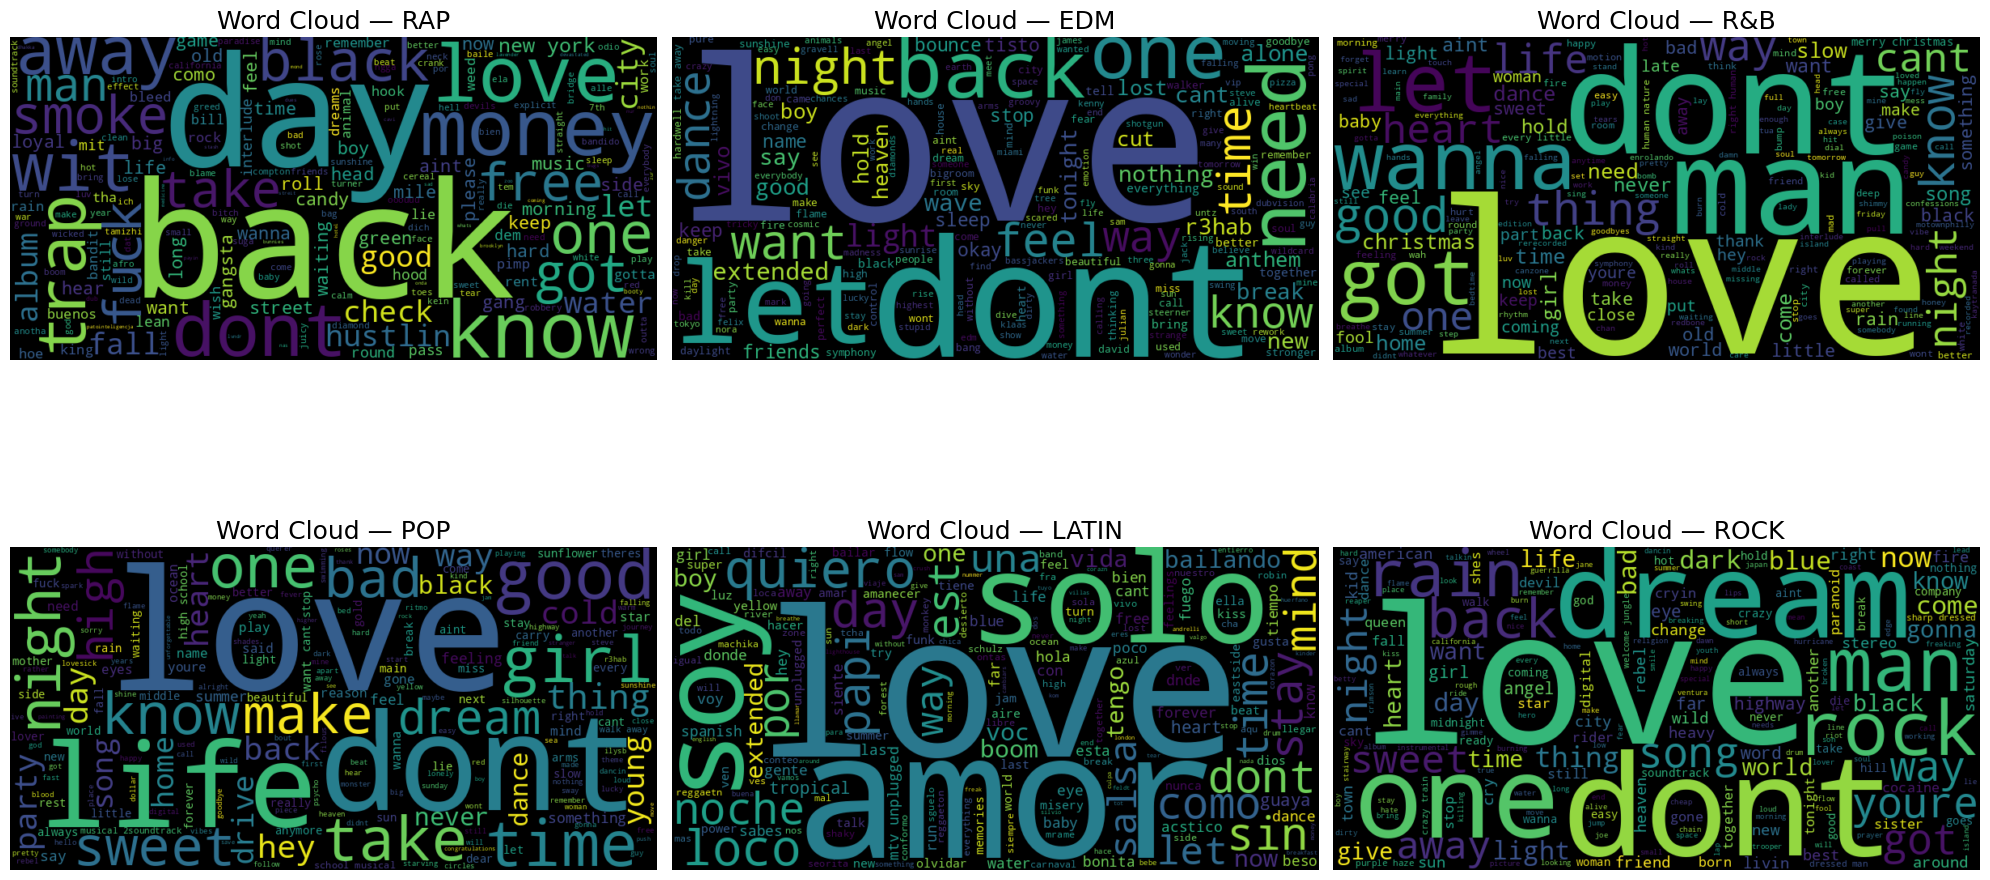

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, genre in enumerate(top_genres):

    # select titles
    titles = df_subset[df_subset['playlist_genre'] == genre]['track_name']

    # clean titles
    cleaned_words = []
    for title in titles:
        cleaned_words.extend(clean_words_from_title(title))

    # if the genre has no valid words, we skip it
    if len(cleaned_words) == 0:
        axes[i].text(0.5, 0.5, f"No valid words for {genre}", ha='center')
        axes[i].axis('off')
        continue

    # building clean text
    text = " ".join(cleaned_words)

    # generate world cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="black",
        colormap="viridis"
    ).generate(text)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f"Word Cloud — {genre.upper()}", fontsize=18)
    axes[i].axis('off')

# disable empty subplots if there are fewer than 6 genres

for j in range(len(top_genres), 6):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In this section, I expanded the Word Cloud analysis with a quantitative approach, aiming to identify the top 10 most frequent words in song titles for each musical genre.

For every genre, I followed these steps:

- Extracted all available titles from the subset.

- Preprocessed them using the same text-cleaning function (standard stopwords + custom stopwords).

- Calculated the frequency of each word using Counter.

- Generated a bar chart highlighting the top 10 dominant words.

This analysis provides a numerical perspective on the recurring themes within each musical genre and validates the visual observations obtained from the Word Clouds.


In [22]:
genre_word_freq = {}

for genre in top_genres:
    titles = df_subset[df_subset['playlist_genre'] == genre]['track_name']

    cleaned_words = []
    for title in titles:
        cleaned_words.extend(clean_words_from_title(title))

    freq = Counter(cleaned_words).most_common(10)  # top 10 words
    genre_word_freq[genre] = freq


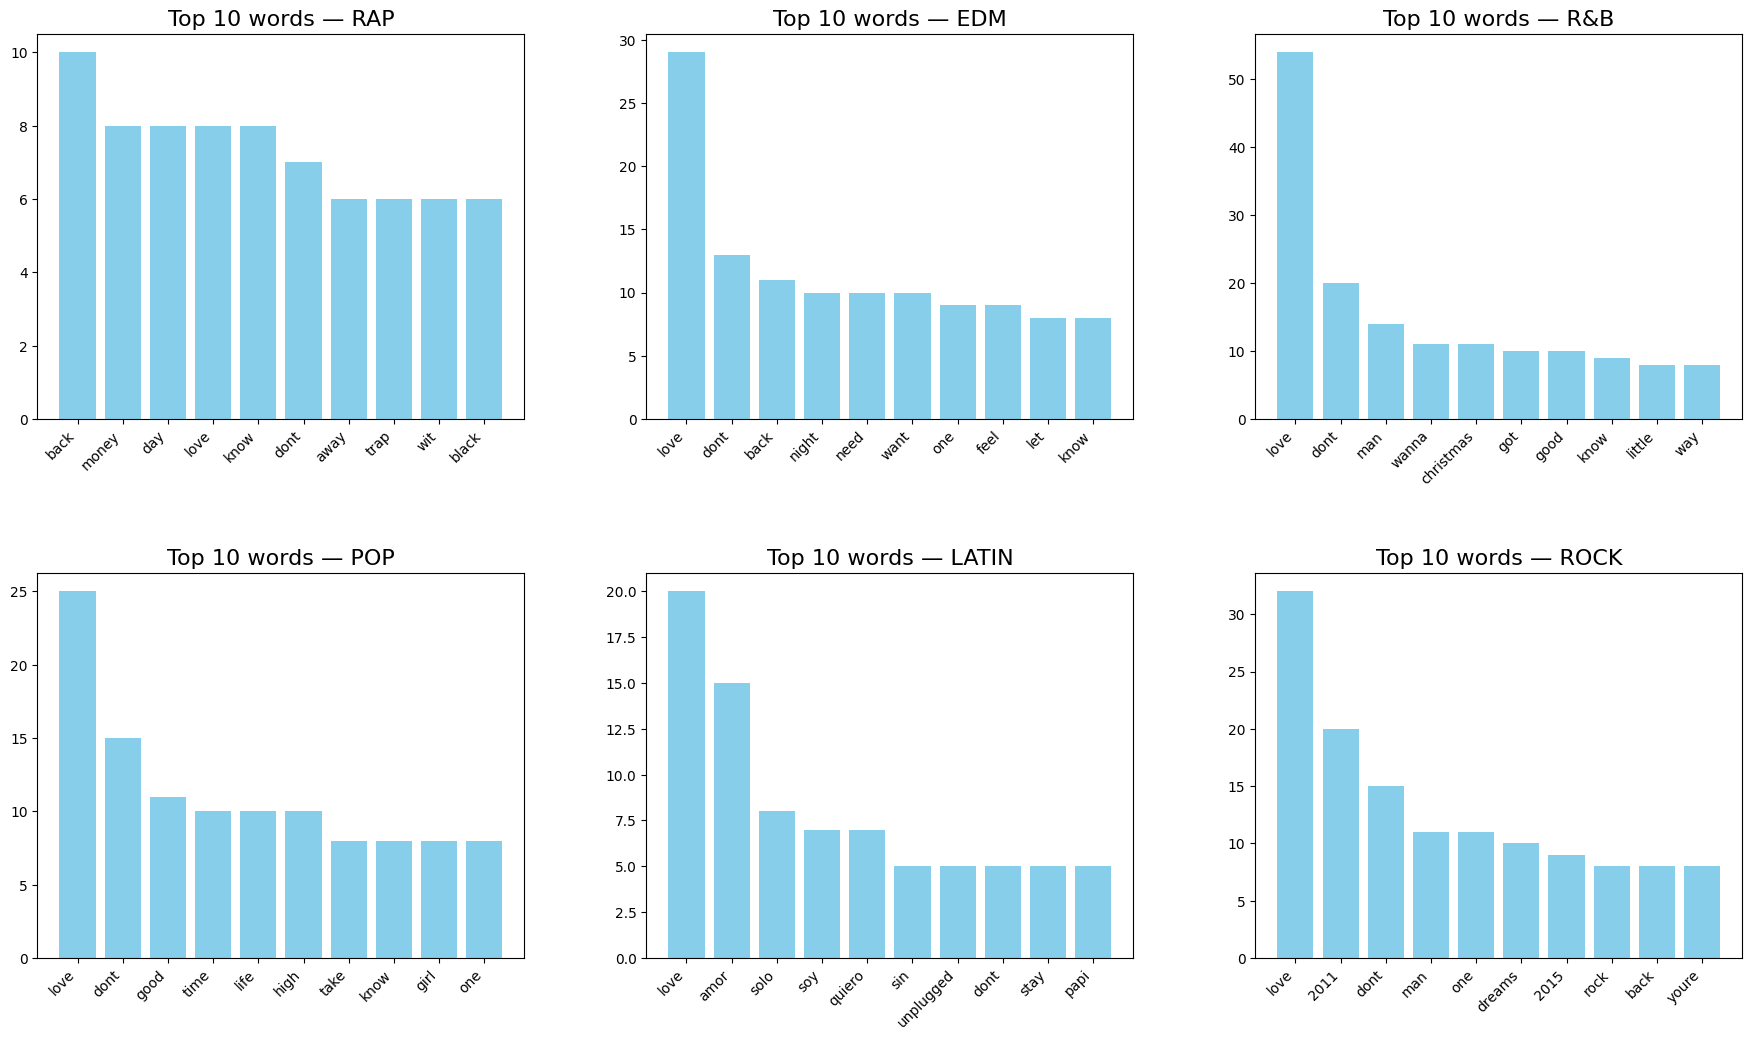

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
axes = axes.flatten()

for i, genre in enumerate(top_genres):
    freq = genre_word_freq[genre]

    if len(freq) == 0:
        axes[i].text(0.5, 0.5, "No valid words", ha="center")
        axes[i].axis("off")
        continue

    words = [w for w, _ in freq]
    counts = [c for _, c in freq]

    axes[i].bar(words, counts, color="skyblue")
    axes[i].set_title(f"Top 10 words — {genre.upper()}", fontsize=16)
    axes[i].set_xticks(range(len(words)))
    axes[i].set_xticklabels(words, rotation=45, ha='right')

    axes[i].tick_params(axis='x', labelsize=10)

# fill empty subplots if we have fewer than 6 genres
for j in range(len(top_genres), 6):
    axes[j].axis('off')

plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.show()

# STAGE 2 – COLLABORATIVE FILTERING (STATISTICAL ERA)

- Central idea: In this stage, the recommendation system no longer relies solely on song features, but instead learns from the collective behavior of users. If two users show similar preferences (for example, they listen to the same songs), then the system can recommend tracks that one user has not yet listened to but are appreciated by other users with similar tastes.

- Models used:
  1. User–Item Filtering (Co-Listening) – based on the idea that “similar users tend to appreciate the same songs”: if other users who listened to song X also listened to song Y, then Y can be recommended.

  2. SVD (Matrix Factorization) – decomposes the user–item matrix and extracts latent factors that model the hidden tastes of users.

- Historical context: This stage corresponds to the 2000s, with the rise of platforms such as Netflix and Amazon, when recommendation methods based on statistical models and collective data began to surpass approaches based solely on content.


## 2.1 Simulation of listening data / ratings

- We generate a synthetic set of users, songs, and ratings (between 1 and 5), using the songs from the `df_subset`.


In [25]:
# simulate 200 users and 500 songs
num_users = 200
num_songs = 500

# select 500 songs from the subset, add a "song_id"
songs_sample = df_subset.sample(num_songs, random_state=42).reset_index(drop=True)
songs_sample['song_id'] = songs_sample.index   # ESSENTIAL

# extract the list of genres
genres = songs_sample['playlist_genre'].unique()

# ---------------------------------------------------
# CREATE THE PROFILE FOR EACH USER (favorite genre + disliked genre)
# ---------------------------------------------------
user_profiles = []
for uid in range(1, num_users + 1):
    fav = np.random.choice(genres)
    hate = np.random.choice([g for g in genres if g != fav])
    user_profiles.append((uid, fav, hate))

user_profiles = pd.DataFrame(user_profiles,
                             columns=['user_id', 'fav_genre', 'hate_genre'])

# ---------------------------------------------------
# GENERATE RATINGS BASED ON PREFERENCES
# ---------------------------------------------------
rows = []

for _, user in user_profiles.iterrows():
    for _, song in songs_sample.iterrows():

        # Probability that the user listened to the song
        if np.random.rand() > 0.35:
            continue

        genre = song['playlist_genre']

        # set the mean rating depending on genre
        if genre == user['fav_genre']:
            mu = 4.5
        elif genre == user['hate_genre']:
            mu = 2.0
        else:
            mu = 3.0

        # realistic distribution (normal)
        rating = np.clip(np.random.normal(mu, 0.7), 1, 5)

        rows.append((user['user_id'], song['song_id'], round(rating)))

# final ratings_df
ratings_df = pd.DataFrame(rows, columns=['user_id', 'song_id', 'rating'])

# ---------------------------------------------------
# ADD SONG TITLE FOR READABILITY (optional)
# ---------------------------------------------------
ratings_df = ratings_df.merge(
    songs_sample[['song_id', 'track_name']],
    on='song_id',
    how='left'
)

print("Simulated listening dataset:", ratings_df.shape)
ratings_df.head()


Simulated listening dataset: (35103, 4)


,user_id,song_id,rating,track_name
0,1,2,2,Only God Can Judge Me
1,1,5,2,Un Veneno
2,1,7,3,Dance?
3,1,8,3,Stairway to Heaven - Remaster
4,1,10,2,Jimmy Fallon


## 2.2 Collaborative Filtering Model – SVD (Matrix Factorization)

In this stage, we build a collaborative recommendation system based on user–item matrix factorization using SVD.
To obtain realistic results, we use:

* user centering (Netflix Prize trick)
* dimensionality reduction (truncated SVD)
* reconstruction of missing ratings based on latent factors
* personalized recommendations for each user


### Why do we center the ratings?

Users do not use the same scale (some are “generous,” others very strict).

To remove this bias, we subtract each user’s mean rating.
This allows SVD to learn the user’s true preferences, not their personal rating style.


In [26]:
# ============================================
# 1. USER CENTERING – Netflix Prize Trick
# ============================================

import numpy as np
import pandas as pd

# mean rating of each user
user_means = ratings_df.groupby('user_id')['rating'].mean()

# centered rating = rating - user's mean
ratings_df_centered = ratings_df.copy()
ratings_df_centered['rating_centered'] = ratings_df_centered.apply(
    lambda r: r['rating'] - user_means[r['user_id']],
    axis=1
)

ratings_df_centered.head()


,user_id,song_id,rating,track_name,rating_centered
0,1,2,2,Only God Can Judge Me,-1.130178
1,1,5,2,Un Veneno,-1.130178
2,1,7,3,Dance?,-0.130178
3,1,8,3,Stairway to Heaven - Remaster,-0.130178
4,1,10,2,Jimmy Fallon,-1.130178


### Why do we use the centered matrix for SVD?

Through centering:

* positive values mean “above my average”
* negative values mean “below my average”
* zero = unknown or exactly the average

SVD works optimally when the data is centered.


In [27]:
# ============================================
# 2. BUILD THE CENTERED USER–ITEM MATRIX
# ============================================

user_item_matrix = ratings_df_centered.pivot_table(
    index="user_id",
    columns="song_id",
    values="rating_centered",
).fillna(0)

R = user_item_matrix.values

user_item_matrix.head()


song_id,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,-1.130178,0.000000,0.000000,-1.130178,0.000000,-0.130178,-0.130178,0.0,...,1.869822,0.000000,-1.130178,0.0,-0.130178,0.869822,0.0,0.000000,0.000000,-0.130178
2,0.000000,0.010811,0.010811,0.000000,0.010811,0.000000,1.010811,0.000000,0.000000,0.0,...,2.010811,0.000000,0.000000,0.0,0.000000,0.010811,0.0,0.000000,2.010811,0.010811
3,1.944444,-0.055556,0.000000,-0.055556,0.000000,-2.055556,0.000000,-2.055556,0.000000,0.0,...,0.000000,-1.055556,0.000000,0.0,0.000000,-1.055556,0.0,-1.055556,-1.055556,0.944444
4,0.000000,0.000000,-0.029586,0.000000,0.000000,-1.029586,-0.029586,-0.029586,0.000000,0.0,...,0.970414,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.970414
5,-0.936047,0.063953,0.000000,0.000000,0.000000,0.000000,0.000000,0.063953,0.063953,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.063953,0.000000,0.000000


### What does SVD do here?

1. It decomposes the matrix into latent factors (hidden user tastes + hidden item characteristics).

2. It reconstructs the missing ratings.

3. We add back the user’s mean at the end → returning to the 1–5 scale.

We limit the scores to a maximum of 5 for correct interpretation.


In [28]:
# ============================================
# 3. TRUNCATED SVD + RECONSTRUCTION
# ============================================

U, sigma, Vt = np.linalg.svd(R, full_matrices=False)

k = 25  # number of latent factors
sigma_k = np.diag(sigma[:k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]

# Predicted matrix in the centered system
R_pred_centered = U_k @ sigma_k @ Vt_k

# Return to the 1–5 scale by adding back the user means
R_pred = R_pred_centered + user_means.values[:, None]

R_pred[:5, :5]


array([[3.20213752, 2.71731386, 2.69316745, 3.0463744 , 2.8907564 ],
       [2.83995723, 2.51287586, 2.72902464, 2.60556616, 2.43320416],
       [4.00874712, 3.02973744, 3.16755717, 3.20259797, 3.09524288],
       [3.01405382, 3.41917155, 3.47841501, 3.79352387, 2.97593284],
       [2.35601833, 2.72410769, 2.78946588, 3.42977502, 2.631988  ]])

## 2.3 Recommendations for a User

- We recommend the top-N songs to a user based on the scores predicted by the model.


In [29]:
# ============================================
# FINAL SMART RECOMMENDATION FUNCTION
# ============================================

def recommend_for_user_smart(user_id, top_n=10):

    if user_id not in user_item_matrix.index:
        print(f"User {user_id} does not exist in the matrix.")
        return

    user_index = user_item_matrix.index.get_loc(user_id)
    scores = R_pred[user_index]

    user_ratings = ratings_df[ratings_df['user_id'] == user_id]
    rated_song_ids = set(user_ratings['song_id'])

    sorted_idx = np.argsort(scores)[::-1]

    recommendations = []
    for pos in sorted_idx:
        song_id = user_item_matrix.columns[pos]
        if song_id not in rated_song_ids:
            score = float(min(scores[pos], 5))  # limit to 5
            recommendations.append((song_id, score))
        if len(recommendations) == top_n:
            break

    # songs already listened to
    listened_df = (
        songs_sample.loc[user_ratings['song_id']][['track_name','track_artist','playlist_genre']]
        .copy()
    )
    listened_df['rating'] = user_ratings.set_index('song_id')['rating']

    # new recommendations
    rec_song_ids = [s[0] for s in recommendations]
    rec_scores = [s[1] for s in recommendations]

    recom_df = (
        songs_sample.loc[rec_song_ids][['track_name','track_artist','playlist_genre']]
        .copy()
    )
    recom_df['predicted_score'] = rec_scores

    print(f"\n=== SMART-SVD Recommendations for user_id = {user_id} ===\n")
    print("Songs already listened to (with rating):")
    display(listened_df)

    print("\nSVD Recommendations (new songs):")
    display(recom_df)

    return None


In [30]:
# =======================================================
# TEST EXAMPLE
# =======================================================
recommend_for_user_smart(15, top_n=10)




=== SMART-SVD Recommendations for user_id = 15 ===

Songs already listened to (with rating):


,track_name,track_artist,playlist_genre,rating
0,Let Me Love You,DJ Snake,edm,2
2,Only God Can Judge Me,2Pac,rap,2
3,Insta,Bizzey,latin,2
10,Jimmy Fallon,Lucho SSJ,rap,2
16,Ode to Viceroy,Mac DeMarco,pop,5
...,...,...,...,...
477,Peanut Butter Jelly,Galantis,pop,3
479,Up On Cripple Creek - Remastered 2000,The Band,rock,1
488,I Don't Know My Name,Grace VanderWaal,pop,3
492,In My Mind,The Amazons,rock,2



SVD Recommendations (new songs):


,track_name,track_artist,playlist_genre,predicted_score
324,Seve - Radio Edit,Tez Cadey,latin,3.870481
179,"You Got Me: Brooklyn Brand Mixtape, Vol.1",Roc DaGuard,r&b,3.796728
47,Six Feet Under,The Weeknd,r&b,3.778512
358,Do Me,Kim Petras,pop,3.755969
134,Slow,SHY Martin,pop,3.725776
122,Get Lucky,Daft Punk,pop,3.724951
463,"break up with your girlfriend, i'm bored",Ariana Grande,pop,3.697379
400,Hear Me Now,Alok,pop,3.693047
238,Dive In,Lonely in the Rain,edm,3.681719
427,Torn,Ava Max,pop,3.680412


## 2.4 Co-Listening–Based Recommendations (user–item logic)

In this section, we implement a recommendation method inspired by the behavior of streaming platforms (e.g., Spotify, Apple Music), based on the idea:

- “Users who listened to song X also listened to song Y.”

This approach does not rely on song attributes or latent factors — instead, it uses only the intersection of user preferences. The logic is simple and intuitive: if two songs frequently appear together in the listening history of many users, then they are likely similar from the audience’s perspective.


### 2.4.1 Method Concept
The co-listening method is a simple form of collaborative filtering that:

- identifies the users who listened to a given song,
- aggregates all songs listened to by this group,
- counts the frequency of co-occurrences,
- recommends the most frequently co-listened songs.

Thus, the recommendations are determined by collective behavior rather than a mathematical model.


In [31]:
def recommend_based_on_song(song_name, top_n=5):
    # find the song_id of the track
    match = songs_sample[songs_sample['track_name'].str.contains(song_name, case=False, na=False)]
    if match.empty:
        print(f"The song '{song_name}' does not exist in the dataset.")
        return
    target_song_id = match.iloc[0]['song_id']

    print(f"\nSearched song: {match.iloc[0]['track_name']} (song_id={target_song_id})\n")

    # users who listened to song X
    users_who_listened = ratings_df[ratings_df['song_id'] == target_song_id]['user_id'].unique()

    # all songs listened to by these users
    co_listens = ratings_df[ratings_df['user_id'].isin(users_who_listened)]

    # count the frequency of each song
    song_counts = co_listens['song_id'].value_counts()

    # remove the original track
    song_counts = song_counts.drop(target_song_id, errors='ignore')

    # top N co-listened songs
    top_songs = song_counts.head(top_n)

    # build final table
    rec_df = songs_sample.set_index('song_id').loc[top_songs.index][
        ['track_name', 'track_artist', 'playlist_genre']
    ].copy()

    rec_df['co_listen_count'] = top_songs.values

    print("Co-listening based recommendations:\n")
    display(rec_df)

    return


In [32]:
songs_sample['track_name'].sample(20).values

array(['Baller', "Don't Stop", 'Paradise', 'With Tim',
       'Symphonica - Suedes Dubstep Remix', "Shinin'", 'Slow',
       'Cold Water (feat. Justin Bieber & MØ) - Lost Frequencies Remix',
       'Cello Song Feat. Jose Gonzales', 'Jump - Remastered Version',
       'Higher Ground', 'Bad Medicine', 'Finally',
       'Lonely Together (feat. Rita Ora)', 'Combatchy (feat. MC Rebecca)',
       'No Hay Tanto Pan', 'Si Nunca Va a Amanecer', 'Black Beatles',
       'Senza Pensieri (feat. Loredana Bertè & J-AX)',
       'Juicy - 2005 Remaster'], dtype=object)

In [33]:
recommend_based_on_song("Finally")


Searched song: Finally (song_id=36)

Co-listening based recommendations:



,track_name,track_artist,playlist_genre,co_listen_count
song_id,,,,
138,Milky Way,Neil Young,rock,36
164,No Hook,YBN Nahmir,rap,36
37,Silvertongue,Young the Giant,rock,36
480,Twerk Anthem - Original Mix,Tony Junior,edm,36
267,Smoke Break,Jasper Loco,latin,35


## 2.5 Analysis of Similar Users (User–User Similarity)


In [34]:

ratings_unique = (
    ratings_df
    .groupby(['user_id', 'song_id'])['rating']
    .mean()
    .reset_index()
)
pivot = ratings_unique.pivot_table(
    index='user_id',
    columns='song_id',
    values='rating',
    aggfunc='mean'
)
pivot_filled = pivot.fillna(0)


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

user_sim_matrix = cosine_similarity(pivot_filled)
user_sim_df = pd.DataFrame(user_sim_matrix,
                           index=pivot_filled.index,
                           columns=pivot_filled.index)

In [36]:
def most_similar_users(user_id, top_n=5):
    if user_id not in user_sim_df.index:
        return f"User {user_id} does not exist in ratings_df"

    # similarities of the user with all others
    sims = user_sim_df.loc[user_id]

    # sort descending (ignore the user himself)
    sims = sims.drop(user_id).sort_values(ascending=False)

    return sims.head(top_n)


In [37]:
most_similar_users(15, top_n=5)

,15
user_id,
197,0.390593
112,0.384897
135,0.381590
1,0.373631
185,0.373048


Detected genres: {'pop': '#1f77b4', 'edm': '#ff7f0e', 'latin': '#2ca02c', 'rap': '#d62728', 'rock': '#9467bd', 'r&b': '#8c564b'}


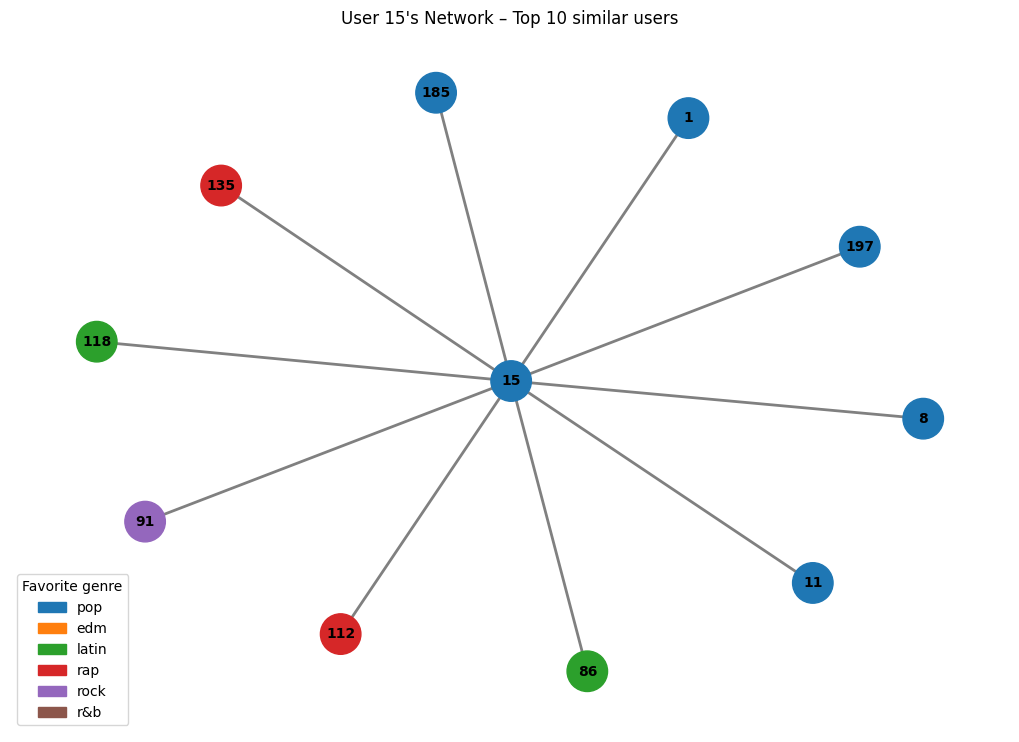

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# -------------------------------------------------------------------
# 1) DEFINE COLORS FOR GENRES (AUTOMATIC)
# -------------------------------------------------------------------
genres = user_profiles['fav_genre'].unique()

# professional color palette
palette = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf"
]

genre_colors = {
    genre: palette[i % len(palette)]
    for i, genre in enumerate(genres)
}

print("Detected genres:", genre_colors)


# -------------------------------------------------------------------
# 2) FULL FUNCTION – CUSTOM NETWORK FOR A USER
# -------------------------------------------------------------------
def plot_user_network(target_user, top_n=10):
    # 1. Take similarity scores for the selected user
    sims = user_sim_df.loc[target_user].drop(target_user)
    top_users = sims.sort_values(ascending=False).head(top_n).index.tolist()

    # include the user in the list
    nodes_to_plot = [target_user] + top_users

    # 2. Subset profiles
    sub_profiles = user_profiles[user_profiles['user_id'].isin(nodes_to_plot)]

    # 3. Build the graph
    G_small = nx.Graph()
    for uid in nodes_to_plot:
        G_small.add_node(uid)

    # edges: only between the target user and the similar ones
    for uid in top_users:
        sim_value = sims[uid]
        G_small.add_edge(target_user, uid, weight=sim_value)

    # 4. Color nodes by genre
    node_colors = []
    for uid in nodes_to_plot:
        genre = sub_profiles[sub_profiles['user_id'] == uid]['fav_genre'].iloc[0]
        node_colors.append(genre_colors.get(genre, "gray"))

    # 5. Layout
    pos = nx.spring_layout(G_small, seed=42)

    # 6. Plot
    plt.figure(figsize=(10, 7))

    nx.draw(
        G_small, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=850,
        font_size=10,
        font_weight="bold",
        edge_color="gray",
        width=2
    )

    # 7. Legend
    legend_handles = [
        mpatches.Patch(color=color, label=genre)
        for genre, color in genre_colors.items()
    ]
    plt.legend(handles=legend_handles, title="Favorite genre", loc="lower left")

    # 8. Title
    plt.title(f"User {target_user}'s Network – Top {top_n} similar users")
    plt.show()


# -------------------------------------------------------------------
# 3) CALL – example for user 15
# -------------------------------------------------------------------
plot_user_network(15, top_n=10)


### **Experiment**: Checking whether SVD recommendations can be explained through similar users

In section 2.3, we obtained a list of recommended songs using the SVD model, a latent-factor-based approach.  
However, SVD is often perceived as a “black box” model because it is not immediately clear **why** a particular song appears in the recommendations.

In section 2.5, we computed similar users based on listening behavior using *cosine similarity*.  
Here, we combine the two methods in a small experiment:

- **Take one of the songs recommended by SVD**  
- **Check whether the similar users have listened to or liked that song**

This allows us to see whether the SVD recommendation is also supported by the co-listening patterns of similar users.  
Such explanations are used in modern platforms (Spotify, YouTube, Netflix) to make recommendations more transparent and trustworthy.


In [39]:
def explain_co_listening(user_id, song_name, top_sim=5):
    """
    Explain the recommendation of a song: check whether similar users have listened to it.
    """

    # 1. Find the song_id
    match = songs_sample[songs_sample['track_name'].str.contains(song_name, case=False, na=False)]
    if match.empty:
        print(f"The song '{song_name}' does not exist in the dataset.")
        return

    song_id = match.iloc[0]['song_id']

    # 2. Find the most similar users
    sims = most_similar_users(user_id, top_n=top_sim)
    similar_users = sims.index.tolist()

    # 3. Check whether each similar user has listened to the song
    rows = []
    for uid in similar_users:
        user_history = ratings_df[ratings_df['user_id'] == uid]
        has_listened = song_id in user_history['song_id'].values

        if has_listened:
            rating = user_history[user_history['song_id'] == song_id]['rating'].iloc[0]
        else:
            rating = None

        rows.append({
            "similar_user": uid,
            "similarity_score": round(sims.loc[uid], 3),
            "has_listened": "yes" if has_listened else "no",
            "rating": rating
        })

    explain_df = pd.DataFrame(rows)

    print(f"\n=== EXPLANATION for recommended song: '{song_name}' ===\n")
    return explain_df


In [40]:
df_exp = explain_co_listening(15, "Finally")
display(df_exp)


=== EXPLANATION for recommended song: 'Finally' ===



,similar_user,similarity_score,has_listened,rating
0,197,0.391,no,NaN
1,112,0.385,no,NaN
2,135,0.382,no,NaN
3,1,0.374,no,NaN
4,185,0.373,yes,4.0


#### Interpretation of the resulting table

The table generated by the `explain_co_listening()` function shows the connection between the SVD recommendation and the similar users:

- *similar_user* — a user similar to the target (from the top N)
- *similarity_score* — how close their tastes are
- *has_listened* — whether the similar user has listened to the analyzed song
- *rating* — what the user thought of the song (if they listened to it)

If several similar users:
- **have listened to the song**, and/or  
- **gave it high ratings**,  

then the SVD recommendation is supported by the real behavior of people with similar tastes — strengthening its validity.

If similar users have not listened to the song, but SVD still recommends it, it means the model discovered a more subtle latent relationship beyond co-listening.

Through this function, we turn the model into an **explainable** recommendation system, which helps understand and justify the results in the project.


## 2.6 Venn Diagram – Popularity vs. Personalized Recommendation

This subsection compares two different types of recommendations:

1. Popularity-based recommendations  
    - Songs that appear most frequently in the entire dataset  
    - They are global “hits,” listened to by many users  
    - They do not take into account the preferences of any specific user  

2. Personalized recommendations (SVD)  
    - Use the collaborative model based on latent factors  
    - Analyze the user’s listening patterns  
    - Suggest new songs that fit the user’s musical profile  


In [41]:
!pip install matplotlib-venn
from matplotlib_venn import venn2

In [42]:
# top 10 most listened songs in the dataset
popularity = (
    ratings_df.groupby("song_id")["rating"]
    .count()
    .sort_values(ascending=False)
)

top_popular_songs = popularity.head(10).index.tolist()


In [43]:
# top 10 SVD recommendations for the selected user
def recommend_svd_for_user(user_id, top_n=10):
    # index of the user in the matrix
    user_index = user_item_matrix.index.get_loc(user_id)

    # all predicted scores for the user
    scores = R_pred[user_index]

    # songs already listened to
    rated = set(ratings_df[ratings_df['user_id'] == user_id]['song_id'])

    # sort all songs in descending order
    sorted_song_ids = np.argsort(scores)[::-1]

    recommendations = []

    for sid in sorted_song_ids:
        song_id = user_item_matrix.columns[sid]
        if song_id not in rated:
            recommendations.append(song_id)
        if len(recommendations) == top_n:
            break

    return recommendations


In [44]:
user_id = 15
top_personalized_songs = recommend_svd_for_user(user_id, top_n=10)

In [45]:
set_popular = set(top_popular_songs)
set_personalized = set(top_personalized_songs)

### What does the diagram show?

We use a Venn diagram to compare the Top 10 most popular songs with the Top 10 SVD recommendations for a selected user (e.g., user_id = 15).

- Left circle = globally popular hits  
- Right circle = personalized recommendations for the user  
- Intersection = songs that are both popular and relevant for this user  

### What conclusion do we draw?

- If the intersection is small → the recommendation system personalizes well and discovers new songs.  
- If the intersection is large → the user has fairly “mainstream” tastes, and the recommendations overlap with the popular songs.  


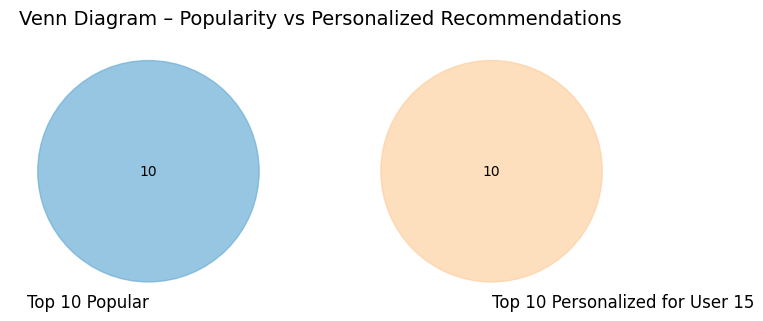

In [46]:
plt.figure(figsize=(8, 8))
v = venn2(
    subsets=(set_popular, set_personalized),
    set_labels=("Top 10 Popular", f"Top 10 Personalized for User {user_id}")
)

# Color ONLY the patches that exist
for patch_id, color in [('10', '#6baed6'),   # popular only
                        ('01', '#fdd0a2'),   # personalized only
                        ('11', '#31a354')]:  # intersection
    patch = v.get_patch_by_id(patch_id)
    if patch:
        patch.set_color(color)
        patch.set_alpha(0.7)

plt.title("Venn Diagram – Popularity vs Personalized Recommendations", fontsize=14)
plt.show()


## Stage 2.7 – Comparison Between Content-Based and Collaborative Filtering

In this stage, we analyze the differences between the two major recommendation paradigms, applied to the same song (“Tadow”), in order to highlight the distinct ways in which they generate musical suggestions.

- Content-Based Filtering  
    - This model recommends songs that share similar audio characteristics, such as energy, valence, tempo, genre, or other musical attributes.  
    - The algorithm relies exclusively on the description of the tracks and does not consider the behavior of other users.  

- Collaborative Filtering  
    - This model identifies recommendations based on the aggregated behavior of users.  
    - Songs are suggested according to the preferences of other listeners who also played and liked the same song, with the model extracting latent factors and collective patterns from the listening data.  


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

song_to_compare = "Tadow"

# =========================================================
# 1. CONTENT-BASED RECOMMENDATIONS — with similarity scores
# =========================================================

cb_raw = recommend_content_based_table(song_to_compare, sim_matrix, top_n=10)

cb_recs = cb_raw[['track_name', 'similarity']].copy()
cb_recs['type'] = 'Content-Based'
cb_recs = cb_recs[['track_name', 'type', 'similarity']]


# =========================================================
# 2. COLLABORATIVE (SVD) RECOMMENDATIONS — with similarity scores
# =========================================================

user_id = 15
scores = R_pred[user_item_matrix.index.get_loc(user_id)]
sorted_idx = np.argsort(scores)[::-1]

cf_rows = []
count = 0
for pos in sorted_idx:
    song_id = user_item_matrix.columns[pos]

    if song_id in ratings_df[ratings_df['user_id'] == user_id]['song_id'].values:
        continue  # ignore songs already listened to

    track = songs_sample.loc[song_id]['track_name']
    score = float(scores[pos])

    cf_rows.append([track, "Collaborative", score])
    count += 1
    if count == 10:
        break

cf_recs = pd.DataFrame(cf_rows, columns=["track_name", "type", "similarity"])


# =========================================================
# 3. SIDE-BY-SIDE DISPLAY (2 tables)
# =========================================================

def display_side_by_side(dfs:list, titles:list):
    html = ""
    for df, title in zip(dfs, titles):
        html += f"<div style='float:left; margin-right:40px'><h3>{title}</h3>{df.to_html(index=False)}</div>"
    display_html(html, raw=True)

display_side_by_side(
    [cb_recs, cf_recs],
    ["Content-Based Recommendations", "Collaborative (SVD) Recommendations"]
)


track_name,type,similarity
Even When It Hurts (feat. Hillsong United & Samuel Nuñez),Content-Based,1.000
Sorry,Content-Based,0.998
Euromillón,Content-Based,0.994
Bubbly,Content-Based,0.994
Bubbly,Content-Based,0.994
Who Hurt You?,Content-Based,0.994
Llegaste Tú,Content-Based,0.992
Drive,Content-Based,0.992
Coming Back - Maya Jane Coles Remix,Content-Based,0.991
Stupid In Love,Content-Based,0.991


# STAGE 3 – NEURAL / CONTEXTUAL (MODERN ERA)

Basic idea

Modern recommender systems no longer limit themselves to comparing songs based on explicit attributes — they learn directly from the **context** in which songs appear (playlists, sessions, temporal order).  
This allows the model to automatically discover subtle relationships between tracks — similar to how recommendations work on Spotify, YouTube, or TikTok.

<br>

In this stage, we explore two different ways of building contextual models:

1. Word2Vec on simulated playlists (randomly generated corpus)

- playlists are treated as “sentences,” and songs as “words”
- the model learns which songs appear together in artificial contexts
- the goal is to see whether the learned relationships remain coherent despite synthetic data

2. Word2Vec on genre-themed playlists (semantically structured corpus)

- each playlist represents a genre (pop, rock, rap, latin, r&b, edm)
- the structure is much more organized, and the model learns real relationships between genres and songs
- we can compare results with the first model to observe the differences

</br>

The two Word2Vec models therefore use different corpora, and this helps us analyze how the structure of the data affects the quality of the recommendations.


### 3.1 Simulating Playlists (Contextual Data)

In the first step, we prepare contextual data for Word2Vec. The central idea is to treat each playlist as a “sentence” made up of songs, similar to how NLP processes sequences of words.

These playlists simulate real situations: songs listened to together in a session, in a certain mood, with a specific vibe, etc.

To simulate playlists, we apply filters that reflect real criteria of organization:

- energy  
- valence (mood)  
- danceability  
- tempo  
- musical genre  

The `generate_playlist()` function applies these filters and returns a coherent set of songs, forming a contextual playlist.


In [48]:
# function for generating playlists based on vibe/context
def generate_playlist(df,
                      genre=None,
                      min_dance=None,
                      max_dance=None,
                      energy_range=None,
                      valence_range=None,
                      tempo_range=None,
                      limit=15):

    playlist = df.copy()

    if genre:
        playlist = playlist[playlist["playlist_genre"] == genre]

    if min_dance is not None:
        playlist = playlist[playlist["danceability"] >= min_dance]

    if max_dance is not None:
        playlist = playlist[playlist["danceability"] <= max_dance]

    if energy_range:
        low, high = energy_range
        playlist = playlist[
            (playlist["energy"] >= low) & (playlist["energy"] <= high)
        ]

    if valence_range:
        low, high = valence_range
        playlist = playlist[
            (playlist["valence"] >= low) & (playlist["valence"] <= high)
        ]

    if tempo_range:
        low, high = tempo_range
        playlist = playlist[
            (playlist["tempo"] >= low) & (playlist["tempo"] <= high)
        ]

    tracks = playlist["track_name"].dropna().unique().tolist()

    return tracks[:limit]


### Automatic Generation of Contextual Playlists (Corpus 1 for Word2Vec)

In this stage, we build the first type of corpus for Word2Vec, based on simulated playlists. The idea is to generate lists of songs that could realistically be listened to together in a certain vibe, using random conditions for energy, valence, tempo, and danceability.

This corpus helps us analyze how Word2Vec behaves when the data is not perfectly structured, but rather a random mix of songs — similar to chaotic playlists created by users in real life.

For each playlist:

- the intervals for energy and valence are chosen randomly, suggesting different moods (party, chill, workout)
- the number of songs is between 25 and 30
- the musical genre is left unconstrained → mixed playlists
- the result imitates how Spotify models listening sequences

These generated playlists become the first Word2Vec corpus and will later allow us to compare what the model learns versus a more structured corpus (the genre-based one in the next section).


In [49]:
# === Generate 7 contextual playlists (25–30 songs each) ===
import random
contextual_playlists = []

for i in range(7):
    playlist = generate_playlist(
        df,                                 # dataset already loaded
        genre=None,                          # leave genre unrestricted → mixed playlists
        min_dance=round(random.uniform(0.2, 0.8), 2),
        energy_range=(
            round(random.uniform(0.2, 0.7), 2),
            round(random.uniform(0.7, 1.0), 2)
        ),
        valence_range=(
            round(random.uniform(0.1, 0.5), 2),
            round(random.uniform(0.5, 0.9), 2)
        ),
        limit=random.randint(25, 30)         # between 25 and 30 songs
    )
    contextual_playlists.append(playlist)

print(f"I generated {len(contextual_playlists)} contextual playlists.")
for idx, pl in enumerate(contextual_playlists, 1):
    print(f"\nPlaylist {idx} — {len(pl)} songs")
    print(pl[:10], "...")


I generated 7 contextual playlists.

Playlist 1 — 28 songs
["I Don't Care (with Justin Bieber) - Loud Luxury Remix", 'Beautiful People (feat. Khalid) - Jack Wins Remix', "If I Can't Have You - Gryffin Remix", 'Say My Name (feat. Bebe Rexha & J Balvin) - Lucas & Steve Remix', 'Hold Me While You Wait - Steve Void Remix', 'Signs - Eden Prince Remix', "White Mercedes - EDX's Miami Sunset Remix", 'Gone - The Wild Remix', 'joy. (R3HAB Remix)', 'Loco Contigo (with J. Balvin & Tyga) - Cedric Gervais Remix'] ...

Playlist 2 — 29 songs
["I Don't Care (with Justin Bieber) - Loud Luxury Remix", 'Memories - Dillon Francis Remix', 'All the Time - Don Diablo Remix', 'Someone You Loved - Future Humans Remix', 'Beautiful People (feat. Khalid) - Jack Wins Remix', "If I Can't Have You - Gryffin Remix", 'Cross Me (feat. Chance the Rapper & PnB Rock) - M-22 Remix', 'Body On My', 'South of the Border (feat. Camila Cabello & Cardi B) - Andy Jarvis Remix', 'Say My Name (feat. Bebe Rexha & J Balvin) - Lucas & 

## 3.2 Training the Word2Vec Model (Item2Vec)

With our first corpus of simulated playlists ready, we can train a Word2Vec model to learn contextual relationships between songs. In this setup, we treat:

- song = word  
- playlist = sentence  

Thus, Word2Vec learns vector representations for songs based on how they appear together in playlists — just like in NLP, where semantically related words occur in similar contexts.

The model should capture:

- the style and vibe of songs  
- energetic and emotional similarities  
- recurring co-occurrences  
- subtle compatibilities between tracks  

This first model is trained exclusively on mixed, randomly generated playlists, meaning that the contextual learning is weaker and more variable.  
Because of this, the quality of the recommendations will be good but not exceptional — making it an ideal comparison point for the second model, which will be trained later on strictly genre-organized playlists.


In [50]:
!pip install gensim
from gensim.models import Word2Vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 75.0 MB/s eta 0:00:00


### 3.2.1 Training Word2Vec on the Simulated Playlists

The model receives the previously generated playlists and learns embeddings from them.

Important parameters:
- `vector_size=128` – dimension of the vector for each song  
- `window=5` – how many nearby songs count as “context”  
- `sg=1` – skip-gram (better for recommendation tasks)  
- `epochs=20` – training with 20 passes  

After training, we can ask the model for “similar songs,” just like on modern streaming platforms.


In [51]:
# === Training the Word2Vec model on the simulated playlists ===

model = Word2Vec(
    sentences=contextual_playlists,   # playlists generated above
    vector_size=128,                  # embedding dimension
    window=5,                         # size of the context window (how many neighbors you "see")
    min_count=1,                      # keep all songs
    sg=1,                             # skip-gram (better for recommendations)
    workers=4,                        # multi-threading
    epochs=20                         # number of passes over the data
)

print("The Word2Vec model was successfully trained!")


The Word2Vec model was successfully trained!


### Song Recommendations Using Word2Vec

In this section, we test whether the model has learned coherent relationships. We select a song from the first playlist and use the `most_similar()` function to see which tracks appear in similar contexts.

Since the playlists are random and mixed, the recommendations may be:

- fairly good, but not extremely precise  
- influenced by the random combinations within the playlists  
- useful as a “baseline” to show how the results change when we switch to the genre-organized corpus  

This prepares us for the next step: training a more structured Word2Vec model based on clean, genre-specific playlists — where the embeddings will be more precise and the results more intuitive.


In [52]:
song = contextual_playlists[0][0]    # first song in first playlist
print(f"Recommendations for: {song}\n")
model.wv.most_similar(song, topn=10)


Recommendations for: I Don't Care (with Justin Bieber) - Loud Luxury Remix



[('What I Like About You (feat. Theresa Rex)', 0.29128962755203247),
 ("Beautiful (feat. Camila Cabello) - Bazzi vs. EDX's Ibiza Sunrise Remix",
  0.2348376214504242),
 ('Slow Dance (feat. Ava Max) - Sam Feldt Remix', 0.16915176808834076),
 ('Stay', 0.15452983975410461),
 ('Quite Miss Home - Steve Void Remix', 0.14181368052959442),
 ('Body On My', 0.1371849775314331),
 ('American Boy - Brooks Remix', 0.12166289240121841),
 ('Body Back (feat. Maia Wright)', 0.11904673278331757),
 ('Crash Into Me', 0.11709495633840561),
 ('Sleepless Nights', 0.11463495343923569)]

### Using the real genres from the dataset

After training the first Word2Vec model on randomly generated playlists, we observed that the recommendations are coherent but still fairly variable — which is expected, since mixed playlists combine songs from very different styles.  
To obtain a cleaner and better-structured corpus, we now extract the real genres from the dataset and use them to generate dedicated playlists for each musical genre.

This structured approach allows us to build a second Word2Vec model that learns relationships between songs in a much more stable and meaningful way.


In [53]:
df["playlist_genre"].dropna().unique()


array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

### Generation of Genre-Constrained Playlists (Corpus 2 for Word2Vec)

In this stage, we generate one playlist for each musical genre (pop, rap, rock, latin, r&b, edm).  
Unlike the random playlists from the first corpus, here every playlist contains only songs belonging to the same genre, further filtered by:

- energy  
- valence (mood)  
- danceability  
- tempo  

Each playlist contains exactly 25 representative songs for that genre, forming a thematic dataset ideal for training a second Word2Vec model.

**Why do we do this?**  
To compare two different training approaches:

- **Model 1:** mixed playlists → learns general compatibilities  
- **Model 2:** genre-based playlists → learns genre-specific compatibilities  

The difference between the recommendations of the two models shows how much the structure of the corpus influences the quality of the embeddings.

The playlists created here will serve as the corpus for the second Word2Vec model, which explicitly learns relationships between GENRES — not just between individual songs.


In [54]:
# === Generate genre-specific playlists FOR TESTING ===

genres = ['pop', 'rap', 'rock', 'latin', 'r&b', 'edm']

genre_playlists = []

for g in genres:
    pl = generate_playlist(
        df,
        genre=g,                     # force the genre!
        min_dance=0.3,
        energy_range=(0.2, 1.0),
        valence_range=(0.1, 0.9),
        limit=25                     # 25 songs per playlist
    )

    # add the genre token at the beginning
    playlist_with_genre = [g] + pl

    genre_playlists.append(playlist_with_genre)
    print(f"✔ Generated playlist for genre {g}: {len(pl)} songs")

print("\nAll playlists have been generated!")


✔ Generated playlist for genre pop: 25 songs
✔ Generated playlist for genre rap: 25 songs
✔ Generated playlist for genre rock: 25 songs
✔ Generated playlist for genre latin: 25 songs
✔ Generated playlist for genre r&b: 25 songs
✔ Generated playlist for genre edm: 25 songs

All playlists have been generated!


### Word2Vec Model Based on Genre-Grouped Playlists

After training the first Word2Vec model on mixed playlists (general corpus), we build a second model using the clean, strictly genre-grouped playlists (pop, rap, rock, latin, r&b, edm).

In this structured corpus, each playlist contains around 25 representative songs belonging to a single genre, and the order of the tracks reflects how they naturally appear together within a well-defined musical style.

This second model does not learn only relationships between songs, but also semantic relationships between **genres**, since the vocabulary includes both genre names and their associated songs.

Thus, the model can identify:

- which songs are most strongly associated with a genre;  
- which songs are compatible with combinations of genres (e.g., pop + rock);  
- which genres tend to appear together in thematic playlists.  

This provides a more refined understanding of stylistic compatibility and enables recommendations that go beyond simple numerical similarity between songs.


In [55]:
model2 = Word2Vec(
    sentences=genre_playlists,
    vector_size=100,
    window=5,
    sg=1,
    min_count=1,
    epochs=20
)

print("Word2Vec model trained on genre playlists!")


Word2Vec model trained on genre playlists!


In [56]:
model2.wv.most_similar(positive=["pop", "rock"], topn=10)


[('Slow Dance (feat. Ava Max) - Sam Feldt Remix', 0.31859293580055237),
 ('Bandit (with YoungBoy Never Broke Again)', 0.2675122022628784),
 ('Hot (Remix) [feat. Gunna and Travis Scott]', 0.26193827390670776),
 ('What to Do', 0.2409943789243698),
 ('Electric Feel (Kygo Remix)', 0.230488583445549),
 ('edm', 0.2286297231912613),
 ('ROXANNE', 0.1936596930027008),
 ('Someone You Loved - Future Humans Remix', 0.18858668208122253),
 ('Shadow Of Your Love', 0.18529576063156128),
 ('Out Ta Get Me', 0.18432718515396118)]

### Genre Recommendations Based on Preferred Combinations

Naturally, Word2Vec returns both songs and genres in its similarity lists.  
To generate recommendations **strictly at the genre level**, we need a filtering function that extracts only the tokens representing real genres.

The `recommend_genre()` function:

- takes the raw similarities from Word2Vec for a combination of genres (e.g., ["pop", "rock"]);  
- keeps only those tokens that are actual genre names;  
- sorts the genres based on their compatibility with the given combination.  

In practice, this function shows us:

- which genres are most semantically close to the combination provided;  
- which genres are compatible with the resulting vibe of the two;  
- which genres are “far away” (negative score), indicating styles that do not match that combination.  

This step transforms Word2Vec into a tool useful not only for song recommendations, but also for analyzing relationships between genres — a perspective very similar to how platforms like Spotify understand user preferences.


In [57]:
# List of real genres
genres = ["pop", "rap", "rock", "latin", "r&b", "edm"]

def recommend_genre(model, positive, topn=5):
    # get all raw recommendations
    all_sim = model.wv.most_similar(positive=positive, topn=200)
    # keep only genres
    filtered = [(w, score) for w, score in all_sim if w in genres]
    return filtered[:topn]

# Test: Pop + Rock → which genres are recommended?
print("Genre recommendations for the combination Pop + Rock:")
print(recommend_genre(model2, positive=["pop", "rock"], topn=5))


Genre recommendations for the combination Pop + Rock:
[('edm', 0.2286297231912613), ('latin', 0.13091003894805908), ('r&b', -0.006529803853482008), ('rap', -0.14272327721118927)]


### Visualizing Genre Recommendations (bar chart)

To more easily interpret the relationships learned by the Word2Vec model, we visualize the similarity scores between genres using a bar chart. This allows us to intuitively see which genres are compatible with a certain combination of interests — in our example, Pop + Rock.

Positive bars (pink) indicate the genres that are most semantically close to the given combination and are therefore recommended by the model.  
Negative bars (dark purple) indicate genres that do not match this profile, suggesting that they rarely appear in the same musical contexts.

For the recommended genres, we label the bars with “Rank 1”, “Rank 2”, etc., depending on the strength of the association.  
This visualization provides a clear picture of how the model perceives stylistic compatibility between genres and highlights the semantic structure that Word2Vec discovers in the dataset.


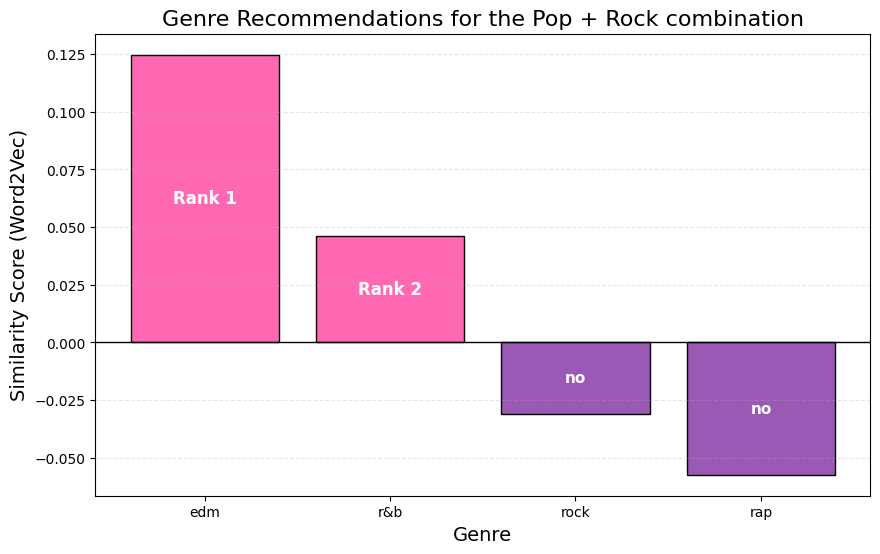

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# === Get recommendations (list of tuples) ===
results = recommend_genre(model2, positive=["latin", "pop"], topn=5)

# If there are no results
if len(results) == 0:
    print("No recommended genres found in the vocabulary.")
else:
    # Separate genres & scores
    genres_out = [g for g, s in results]
    scores_out = [s for g, s in results]

    # Colors: pink = positive, purple = negative
    colors = ['#ff69b4' if s > 0 else '#9b59b6' for s in scores_out]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(genres_out, scores_out, color=colors, edgecolor="black")

    # Zero line
    plt.axhline(0, color='black', linewidth=1)

    # Compute rank only for positive scores
    positive_sorted = sorted(
        [(g, s) for g, s in zip(genres_out, scores_out) if s > 0],
        key=lambda x: x[1],
        reverse=True
    )

    # Map genre -> rank
    rank_map = {g: i+1 for i, (g, _) in enumerate(positive_sorted)}

    # Add RANK inside the bar
    for bar, g, s in zip(bars, genres_out, scores_out):
        if s > 0:  # positive bar → rank inside
            plt.text(
                bar.get_x() + bar.get_width()/2,
                s/2,
                f"Rank {rank_map[g]}",
                ha='center', va='center',
                fontsize=12, fontweight="bold",
                color='white'
            )
        else:  # negative bar → text inside the negative part
            plt.text(
                bar.get_x() + bar.get_width()/2,
                s/2,
                "no",
                ha='center', va='center',
                fontsize=11, fontweight="bold",
                color='white'
            )

    # Title & labels
    plt.title("Genre Recommendations for the Pop + Rock combination", fontsize=16)
    plt.xlabel("Genre", fontsize=14)
    plt.ylabel("Similarity Score (Word2Vec)", fontsize=14)

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()


## 3.3 Advanced Visualization of the Semantic Space of Songs (t-SNE + Word2Vec)

In this section, we visually analyze how the Word2Vec model has learned the relationships between songs based on the context in which they appear in the generated playlists.

The Word2Vec model constructs a semantic vector space in which:

- songs with similar vibe / energy / style end up in nearby regions,  
- songs that are very different appear in distant regions.  

To observe these relationships intuitively, we reduce the dimensionality of the learned embeddings (from 128 dimensions → to 2 dimensions) using the t-SNE algorithm.  
t-SNE compresses the space while preserving the local structure of the data and allows a clear visual representation of the “map” of relationships between songs.

The final result is a 2D semantic map, where each point represents a song and its position reflects the similarities learned by the model based on musical contexts.


In [59]:
from sklearn.manifold import TSNE
import pandas as pd

# 1. extract embeddings from the model
all_songs = list(model.wv.index_to_key)
embeddings = np.array([model.wv[s] for s in all_songs])

# 2. run t-SNE
tsne = TSNE(n_components=2, perplexity=15, random_state=42)
tsne_coords = tsne.fit_transform(embeddings)

# 3. build a song -> real genre mapping from the dataframe
genre_map = dict(zip(df['track_name'], df['playlist_genre']))

# 4. build a DataFrame for visualization using the real genres
vis_df = pd.DataFrame({
    'song': all_songs,
    'x': tsne_coords[:, 0],
    'y': tsne_coords[:, 1],
    'playlist_genre': [genre_map.get(s, "unknown") for s in all_songs]
})


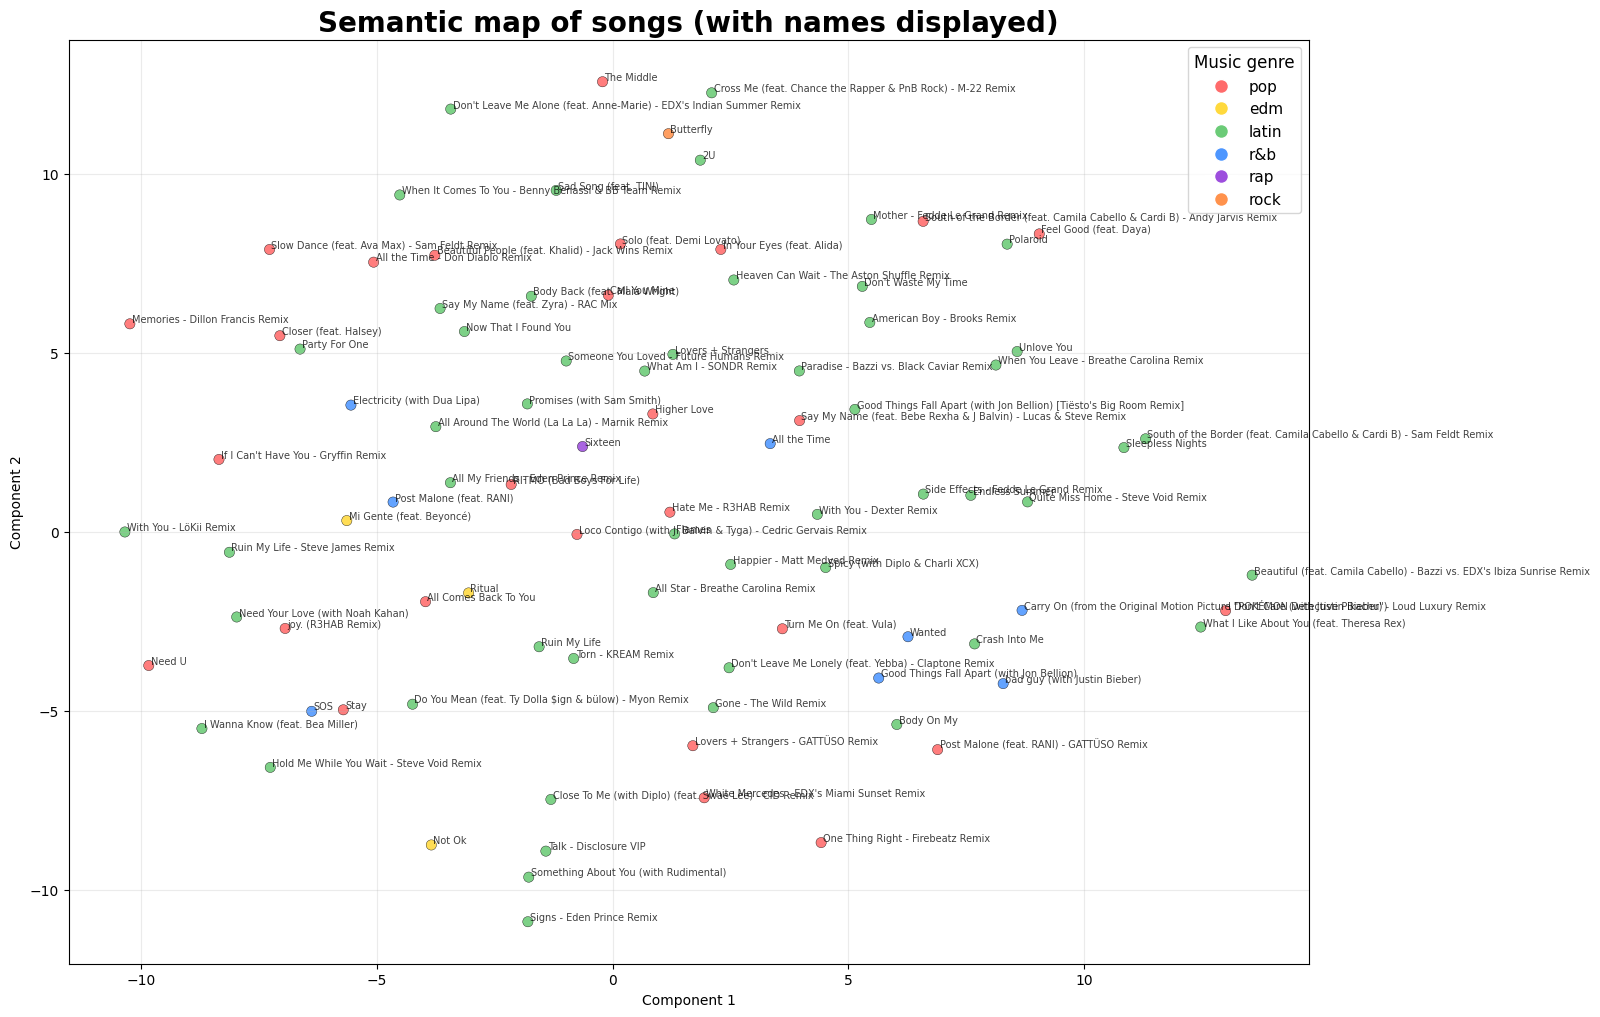

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# vibrant custom palette for genres
vibrant_palette = [
    "#FF6B6B",  # coral red
    "#FFD93D",  # vibrant yellow
    "#6BCB77",  # lime green
    "#4D96FF",  # strong blue
    "#9D4EDD",  # neon purple
    "#FF924C",  # orange
    "#36CFC9",  # turquoise
    "#C77DFF",  # lavender
    "#F72585",  # pink fuchsia
    "#3A0CA3"   # deep indigo
]

# map genre codes to the vibrant palette
genre_codes = vis_df['playlist_genre'].astype('category').cat.codes
num_genres = len(vis_df['playlist_genre'].unique())

color_map = [vibrant_palette[i % len(vibrant_palette)] for i in genre_codes]

# === Semantic Map ===
plt.figure(figsize=(16, 12))

scatter = plt.scatter(
    vis_df['x'], vis_df['y'],
    c=color_map,
    s=55, alpha=0.88, edgecolors='black', linewidth=0.3
)

# song names
for i, row in vis_df.iterrows():
    plt.text(
        row['x'] + 0.04, row['y'] + 0.04,
        row['song'],
        fontsize=7, alpha=0.75
    )

plt.title("Semantic map of songs (with names displayed)", fontsize=20, weight="bold")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# legend
handles = []
labels = vis_df['playlist_genre'].unique()

for i, label in enumerate(labels):
    handles.append(plt.Line2D([0], [0], marker='o', color='w',
                              label=label,
                              markerfacecolor=vibrant_palette[i % len(vibrant_palette)],
                              markersize=10))

plt.legend(handles=handles, title="Music genre", fontsize=11, title_fontsize=12,
           loc='upper right', frameon=True)

plt.grid(alpha=0.25)
plt.show()


### Interpretation of the Semantic Map

The semantic map illustrates how the Word2Vec model perceives similarity between songs.

- Nearby points → songs similar in vibe, energy, rhythm, or structure.  
- Distant points → songs that appear in very different contexts.  
- Colors represent the real genres → we can observe areas where pop, latin, or r&b overlap or separate.  
- The labels with song names confirm that the model positioned songs with common characteristics close to each other.  

Thus, this visualization demonstrates that Word2Vec embeddings capture deep musical relationships, similar to those used in modern recommendation systems such as Spotify or YouTube Music.


## 3.4 Semantic Transition Between Genres (with Artists)

In this section, we build a musical transition between two genres — for example, *“Pop → Rock”* — using the Word2Vec embeddings.  
For each generated step in the transition, we display both the **song title** and the **artist**, so that the resulting playlist is easy to understand and potentially listen to.

Each song is displayed in the format:

`Title — Artist`

This provides a clear interpretation of the vibe at every stage along the semantic path between the two genres.

---

## Visualizing the Semantic Transition on the t-SNE Map

To visually understand how the Word2Vec model constructs a transition between two musical genres (e.g., *Pop → Rock*), we plot the transition path directly on the t-SNE semantic map generated earlier.

Each song corresponds to a point in the semantic space, and the songs in the Pop → Rock transition will appear as a sequence of points connected by a line.  
This allows us to *see* the musical journey the model proposes:

- where it starts (origin genre),  
- which intermediate songs it uses,  
- how it moves through the space,  
- where it ends (target genre).  

This visualization clearly shows how the model understands relationships between genres and how it recommends gradual steps to achieve a natural transition.



🎧 pop → Representative song:
   Sad Song (feat. TINI) — Unknown Artist

🎸 rap → Representative song:
   Sixteen — Unknown Artist


=== Transition pop → rap ===

1. Sad Song (feat. TINI) — Unknown Artist
2. Body On My — Unknown Artist
3. I Wanna Know (feat. Bea Miller) — Unknown Artist
4. Call You Mine — Unknown Artist
5. Sleepless Nights — Unknown Artist
6. RITMO (Bad Boys For Life) — Unknown Artist
7. Sixteen — Unknown Artist


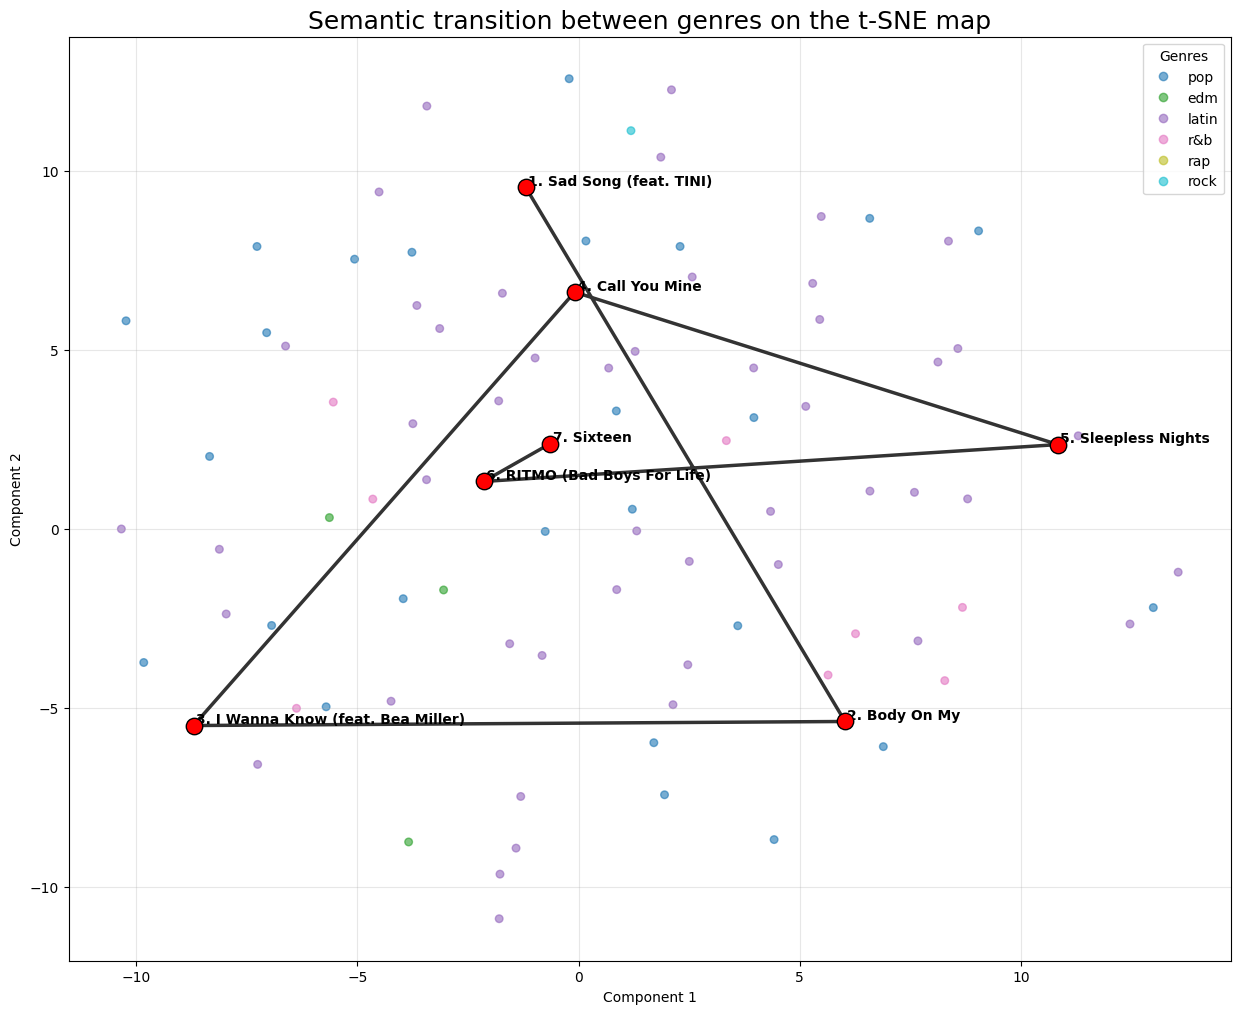

In [61]:
# ============================================================
#     SEMANTIC TRANSITION BETWEEN GENRES – NO REPETITION
# ============================================================

import numpy as np
import random
import matplotlib.pyplot as plt

# -------------------------------------------
#  Helper: extract the artist of a song
#  (from the original songs_sample table)
# -------------------------------------------
def get_artist(song):
    row = songs_sample[songs_sample['track_name'] == song]
    if len(row) > 0:
        return row.iloc[0]['track_artist']
    return "Unknown Artist"


# ---------------------------------------------------------
#  Choose a representative song for a GENRE
#  + avoid duplicates with the upcoming transition
# ---------------------------------------------------------
def representative_song_for_gen(genre, forbidden=None):
    if forbidden is None:
        forbidden = set()

    # songs from the requested genre that exist in the Word2Vec vocabulary
    songs = vis_df[vis_df['playlist_genre'] == genre]['song'].tolist()
    songs = [s for s in songs if s in model.wv.key_to_index and s not in forbidden]

    # fallback: if the genre has too few distinct songs
    if len(songs) == 0:
        print(f"⚠️ Genre {genre} has too few distinct songs.")
        songs = [s for s in vis_df['song'] if s in model.wv.key_to_index and s not in forbidden]

    return random.choice(songs)


# ---------------------------------------------------------
#     Semantic transition between two songs (NO duplicates)
# ---------------------------------------------------------
def semantic_transition(songA, songB, steps=5):
    vA, vB = model.wv[songA], model.wv[songB]
    direction = vB - vA

    playlist = [songA]
    used = set([songA])

    for i in range(1, steps + 1):
        point = vA + direction * (i / (steps + 1))
        nearest = model.wv.similar_by_vector(point, topn=50)

        chosen = None
        for cand, sc in nearest:
            if cand not in used and cand != songB:
                chosen = cand
                break

        if chosen:
            playlist.append(chosen)
            used.add(chosen)

    # add final song ONLY if not already included
    if songB not in used:
        playlist.append(songB)
        used.add(songB)

    return playlist


# ---------------------------------------------------------
#         Full semantic transition between GENRES
# ---------------------------------------------------------
def genre_transition(genreA, genreB, steps=5):
    used_global = set()

    songA = representative_song_for_gen(genreA, forbidden=used_global)
    used_global.add(songA)

    songB = representative_song_for_gen(genreB, forbidden=used_global)
    used_global.add(songB)

    print(f"\n🎧 {genreA} → Representative song:")
    print(f"   {songA} — {get_artist(songA)}\n")

    print(f"🎸 {genreB} → Representative song:")
    print(f"   {songB} — {get_artist(songB)}\n")

    transition = semantic_transition(songA, songB, steps=steps)

    print(f"\n=== Transition {genreA} → {genreB} ===\n")
    for i, s in enumerate(transition):
        print(f"{i+1}. {s} — {get_artist(s)}")

    return transition


# ---------------------------------------------------------
#     t-SNE visualization with the transition path
# ---------------------------------------------------------
def plot_transition_on_tsne(transition_songs):
    plt.figure(figsize=(15, 12))

    scatter = plt.scatter(
        vis_df['x'], vis_df['y'],
        c=vis_df['playlist_genre'].astype('category').cat.codes,
        cmap='tab10', s=30, alpha=0.6
    )

    tx, ty = [], []
    for song in transition_songs:
        row = vis_df[vis_df['song'] == song]
        if len(row) > 0:
            tx.append(row['x'].iloc[0])
            ty.append(row['y'].iloc[0])

    # transition line
    plt.plot(tx, ty, color='black', linewidth=2.5, alpha=0.8)

    # mark transition points
    for i, song in enumerate(transition_songs):
        row = vis_df[vis_df['song'] == song]
        if len(row) > 0:
            x, y = row['x'].iloc[0], row['y'].iloc[0]
            plt.scatter(x, y, color='red', s=140, edgecolor='black', zorder=5)
            plt.text(x + 0.05, y + 0.05, f"{i+1}. {song}", fontsize=10, weight='bold')

    plt.title("Semantic transition between genres on the t-SNE map", fontsize=18)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

    handles, _ = scatter.legend_elements()
    plt.legend(handles, list(vis_df['playlist_genre'].unique()), title="Genres")
    plt.grid(alpha=0.3)
    plt.show()


# ---------------------------------------------------------
#          EXAMPLE RUN
# ---------------------------------------------------------
start_genre = "pop"
target_genre = "rap"

transition_playlist = genre_transition(start_genre, target_genre, steps=5)
plot_transition_on_tsne(transition_playlist)
